In [1]:
#%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import texttable
import gc
import timeit
import sys
import os

# Loading reported and synthetic data

In [3]:
# Revoking top hits frames
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Averoy_seen_deer_stoch_par.pkl"
)
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer_stoch_par.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer_stoch_par.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Sunndal_seen_deer_stoch_par.pkl"
)
top_hits_Vestnes_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Vestnes_seen_deer_stoch_par.pkl"
)
top_hits_Laerdal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Laerdal_seen_deer_stoch_par.pkl"
)

# Without option for emigration
top_hits_Averoy_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Averoy_seen_deer_stoch_par_no_emig.pkl"
)
top_hits_Tingvoll_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer_stoch_par_no_emig.pkl"
)
top_hits_Surnadal_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer_stoch_par_no_emig.pkl"
)
top_hits_Sunndal_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Sunndal_seen_deer_stoch_par_no_emig.pkl"
)
top_hits_Vestnes_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Vestnes_seen_deer_stoch_par_no_emig.pkl"
)
top_hits_Laerdal_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Laerdal_seen_deer_stoch_par_no_emig.pkl"
)

In [4]:
# Reading the given number of top_hits
number_of_top_hits = 20
number_of_years = 17

top_hits_Averoy_seen_deer = top_hits_Averoy_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Tingvoll_seen_deer = top_hits_Tingvoll_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Surnadal_seen_deer = top_hits_Surnadal_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Sunndal_seen_deer = top_hits_Sunndal_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Vestnes_seen_deer = top_hits_Vestnes_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Laerdal_seen_deer = top_hits_Laerdal_seen_deer[
    0 : number_of_top_hits * number_of_years
]

top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]

top_hits_Averoy_sd_no_emigration = top_hits_Averoy_sd_no_emigration[
    0 : number_of_top_hits * number_of_years
]
top_hits_Tingvoll_sd_no_emigration = top_hits_Tingvoll_sd_no_emigration[
    0 : number_of_top_hits * number_of_years
]
top_hits_Surnadal_sd_no_emigration = top_hits_Surnadal_sd_no_emigration[
    0 : number_of_top_hits * number_of_years
]
top_hits_Sunndal_sd_no_emigration = top_hits_Sunndal_sd_no_emigration[
    0 : number_of_top_hits * number_of_years
]
top_hits_Vestnes_sd_no_emigration = top_hits_Vestnes_sd_no_emigration[
    0 : number_of_top_hits * number_of_years
]
top_hits_Laerdal_sd_no_emigration = top_hits_Laerdal_sd_no_emigration[
    0 : number_of_top_hits * number_of_years
]

top_hits_sd_no_emigration = [
    top_hits_Averoy_sd_no_emigration,
    top_hits_Tingvoll_sd_no_emigration,
    top_hits_Surnadal_sd_no_emigration,
    top_hits_Sunndal_sd_no_emigration,
    top_hits_Vestnes_sd_no_emigration,
    top_hits_Laerdal_sd_no_emigration,
]

## Reading the data needed

In [5]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
f_calves = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
y_hinds = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
a_hinds = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
m_calves = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
y_stags = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
a_stags = np.zeros((len(municipalities), number_of_years, number_of_top_hits))

f_calves_no_emig = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
y_hinds_no_emig = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
a_hinds_no_emig = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
m_calves_no_emig = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
y_stags_no_emig = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
a_stags_no_emig = np.zeros((len(municipalities), number_of_years, number_of_top_hits))

for q in range(len(municipalities)):
    for i in range(number_of_years):
        # Emigration allowed
        f_calves_ = top_hits_seen_deer[q][0 : 20 * number_of_years]["f_calves"].values
        f_calves[q, i, :] = f_calves_[i::number_of_years]

        y_hinds_ = top_hits_seen_deer[q][0 : 20 * number_of_years]["y_hinds"].values
        y_hinds[q, i, :] = y_hinds_[i::number_of_years]

        a_hinds_ = top_hits_seen_deer[q][0 : 20 * number_of_years]["a_hinds"].values
        a_hinds[q, i, :] = a_hinds_[i::number_of_years]

        m_calves_ = top_hits_seen_deer[q][0 : 20 * number_of_years]["m_calves"].values
        m_calves[q, i, :] = m_calves_[i::number_of_years]

        y_stags_ = top_hits_seen_deer[q][0 : 20 * number_of_years]["y_stags"].values
        y_stags[q, i, :] = y_stags_[i::number_of_years]

        a_stags_ = top_hits_seen_deer[q][0 : 20 * number_of_years]["a_stags"].values
        a_stags[q, i, :] = a_stags_[i::number_of_years]

        # Emigration not allowed
        f_calves_ = top_hits_sd_no_emigration[q][0 : 20 * number_of_years][
            "f_calves"
        ].values
        f_calves_no_emig[q, i, :] = f_calves_[i::number_of_years]

        y_hinds_ = top_hits_sd_no_emigration[q][0 : 20 * number_of_years][
            "y_hinds"
        ].values
        y_hinds_no_emig[q, i, :] = y_hinds_[i::number_of_years]

        a_hinds_ = top_hits_sd_no_emigration[q][0 : 20 * number_of_years][
            "a_hinds"
        ].values
        a_hinds_no_emig[q, i, :] = a_hinds_[i::number_of_years]

        m_calves_ = top_hits_sd_no_emigration[q][0 : 20 * number_of_years][
            "m_calves"
        ].values
        m_calves_no_emig[q, i, :] = m_calves_[i::number_of_years]

        y_stags_ = top_hits_sd_no_emigration[q][0 : 20 * number_of_years][
            "y_stags"
        ].values
        y_stags_no_emig[q, i, :] = y_stags_[i::number_of_years]

        a_stags_ = top_hits_sd_no_emigration[q][0 : 20 * number_of_years][
            "a_stags"
        ].values
        a_stags_no_emig[q, i, :] = a_stags_[i::number_of_years]

## Plotting figure

CPU times: user 3.92 s, sys: 222 ms, total: 4.14 s
Wall time: 3.44 s


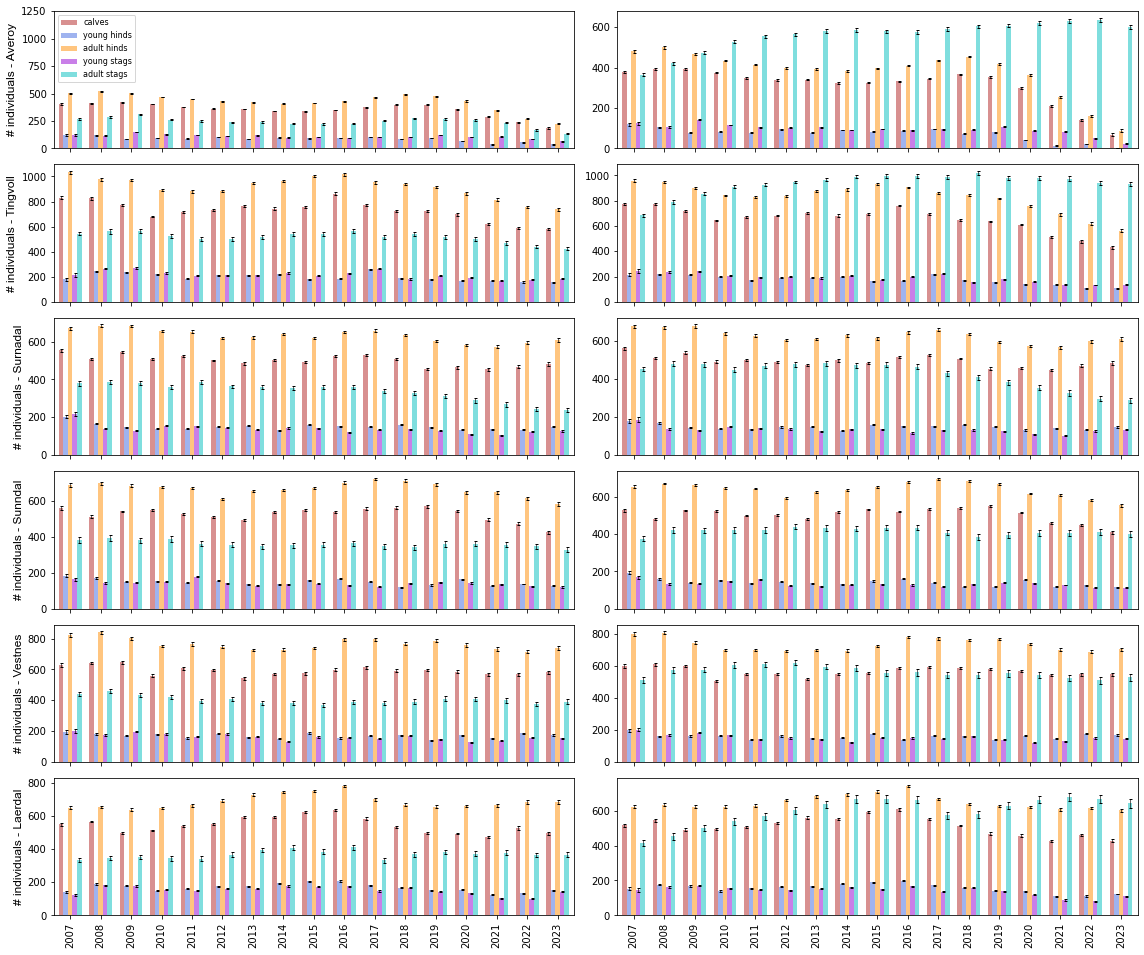

In [6]:
%%time
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(16, 14))
ax1 = [axs[0, 0], axs[1, 0], axs[2, 0], axs[3, 0], axs[4, 0], axs[5, 0]]
ax2 = [axs[0, 1], axs[1, 1], axs[2, 1], axs[3, 1], axs[4, 1], axs[5, 1]]

year_list = np.arange(number_of_years)
years = np.arange(2007, 2023 + 1, 1)
afont = {"fontname": "Arial"}

width = 0.15

# Plotting left panel columns
for q in range(6):
    ax1[q].bar(
        year_list - 2 * width,
        np.mean(f_calves[q, :, :], axis=1) + np.mean(m_calves[q, :, :], axis=1),
        width,
        color="firebrick",
        yerr=np.std((f_calves[q, :, :] + m_calves[q, :, :])/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax1[q].bar(
        year_list - width,
        np.mean(y_hinds[q, :, :], axis=1),
        width,
        color="royalblue",
        yerr=np.std(y_hinds[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax1[q].bar(
        year_list,
        np.mean(a_hinds[q, :, :], axis=1),
        width,
        color="darkorange",
        yerr=np.std(a_hinds[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax1[q].bar(
        year_list + width,
        np.mean(y_stags[q, :, :], axis=1),
        width,
        color="darkviolet",
        yerr=np.std(y_stags[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax1[q].bar(
        year_list + 2 * width,
        np.mean(a_stags[q, :, :], axis=1),
        width,
        color="c",
        yerr=np.std(a_stags[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )

    # no_text = [""] * number_of_years
    if q < 5:
        ax1[q].set_xticks(year_list)
        ax1[q].set_xticklabels([])
    else:
        ax1[q].set_xticks(year_list)
        ax1[q].set_xticklabels(years, rotation="vertical", fontsize=10)

    if q == 0:
        ymin = 0
        ymax = 1250
        ax1[q].set_ylim([ymin, ymax])
        ax1[q].legend(
            ["calves", "young hinds", "adult hinds", "young stags", "adult stags"],
            loc="upper left",
            fontsize=8,
        )

    ax1[q].set_ylabel("# individuals" + " - " + municipalities[q], fontsize=12, **afont)

    ax1[q].margins(x=0.01)

# Plotting right panel columns
for q in range(6):
    ax2[q].bar(
        year_list - 2 * width,
        np.mean(f_calves_no_emig[q, :, :], axis=1)
        + np.mean(m_calves_no_emig[q, :, :], axis=1),
        width,
        color="firebrick",
        yerr=np.std((f_calves_no_emig[q, :, :] + m_calves_no_emig[q, :, :])/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax2[q].bar(
        year_list - width,
        np.mean(y_hinds_no_emig[q, :, :], axis=1),
        width,
        color="royalblue",
        yerr=np.std(y_hinds_no_emig[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax2[q].bar(
        year_list,
        np.mean(a_hinds_no_emig[q, :, :], axis=1),
        width,
        color="darkorange",
        yerr=np.std(a_hinds_no_emig[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax2[q].bar(
        year_list + width,
        np.mean(y_stags_no_emig[q, :, :], axis=1),
        width,
        color="darkviolet",
        yerr=np.std(y_stags_no_emig[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        align="center",
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )
    ax2[q].bar(
        year_list + 2 * width,
        np.mean(a_stags_no_emig[q, :, :], axis=1),
        width,
        color="c",
        align="center",
        yerr=np.std(a_stags_no_emig[q, :, :]/np.sqrt(number_of_top_hits), axis=1),
        alpha=0.5,
        ecolor="black",
        error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
    )

    if q < 5:
        ax2[q].set_xticks(year_list)
        ax2[q].set_xticklabels([])
    else:
        ax2[q].set_xticks(year_list)
        ax2[q].set_xticklabels(years, rotation="vertical", fontsize=10)

    ax2[q].margins(x=0.01)

fig.tight_layout()
fig.subplots_adjust(top=0.94)

save_dir = "figures/"
plt.savefig(save_dir + "Figure_4.pdf", dpi=600, bbox_inches="tight")
pass;